# TensorFlow练手项目

该项目需要实现一个分类问题，输入数据X有两个属性，标签d包含两类，用整形数字0、1表示。
- 读取数据 homework.npz
- 请分析点（0.2， 0.2）所属类别
- 尽可能的提升精度与速度，在精度大于95%时，速度因素更加需要考虑
    - 可以使用多层神经网络
    - 可以进行特征工程
- 使用TensorBoard绘制所搭建的网络模型
- 尝试使用numpy完成预测

## 读取数据

In [1]:
import numpy as np
files = np.load("homework.npz")
X = files['X']
label = files['d']

## 绘制不同特征与对应标签的散点图，以及特征分
参考博客：[从np.random.normal()到正态分布的拟合](https://blog.csdn.net/lanchunhui/article/details/50163669)

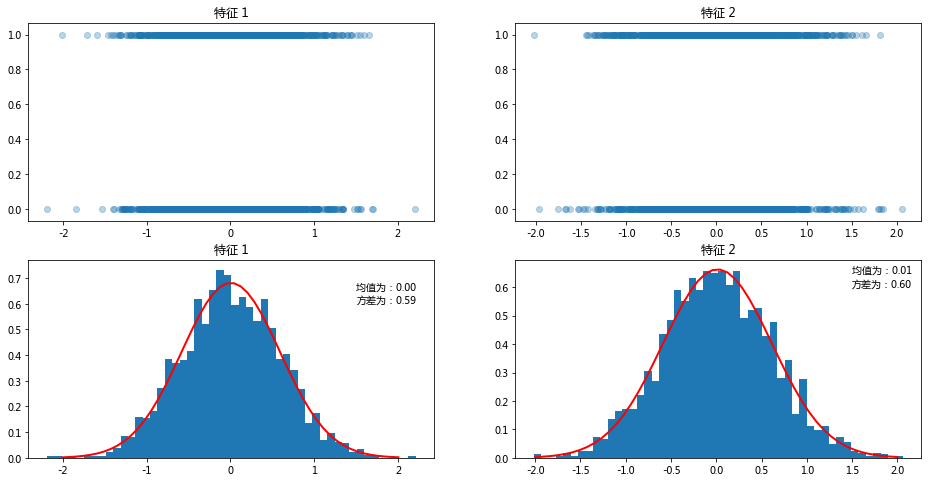

In [37]:
import matplotlib.pyplot as plt
import scipy.stats as st


plt.figure(figsize=(16,8))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,i], label, alpha= 0.3)
    plt.title('特征 {}'.format(i+1))
for i in range(2):
    plt.subplot(2,2,i+3)
    plt.hist(X[:,i],bins=50,density=True)
    x_mean = np.mean(X[:,i])
    x_std = np.std(X[:,i])
    x = np.linspace(-2, 2, 50)
    plt.plot(x, st.norm(x_mean, x_std).pdf(x), lw=2, c='r')
    plt.annotate('均值为：{:.2f} \n方差为：{:.2f}'.format(x_mean, x_std),xy=(1.5,0.6),weight='heavy')
    plt.title('特征 {}'.format(i+1))

>观察上述四幅图像可以发现两特征属于正态分布，与标签分布也比较均衡。因此不需要对数据进行特征归一化和标签均衡

## 标签处理
- 这里使用了独热编码<br>
    将编码0转换为 [1 0]<br>
    将编码1转换为 [0 1]

In [54]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder(sparse=False)
# enc.fit(label.reshape(-1,1))
label_onehot = enc.fit_transform(label.reshape(-1,1))
for i in range(10):
    print(f'原始标签：{label[i]}, 处理后的标签：{label_onehot[i]}')

原始标签：1, 处理后的标签：[0. 1.]
原始标签：1, 处理后的标签：[0. 1.]
原始标签：1, 处理后的标签：[0. 1.]
原始标签：0, 处理后的标签：[1. 0.]
原始标签：0, 处理后的标签：[1. 0.]
原始标签：1, 处理后的标签：[0. 1.]
原始标签：1, 处理后的标签：[0. 1.]
原始标签：0, 处理后的标签：[1. 0.]
原始标签：0, 处理后的标签：[1. 0.]
原始标签：1, 处理后的标签：[0. 1.]


## 搭建神经网络
时间计算参考博客[python计算时间的两种方式：time与datetime](https://blog.csdn.net/a18852867035/article/details/82257682)


1. 隐藏层个数：2 ； 隐藏层元素个数：[6, 6] ；隐藏层激活函数：ReLu函数 ； 训练次数：2001 ； 特征工程：无

In [136]:
import tensorflow as tf
import datetime

x = tf.placeholder(tf.float32, [None, 2], name="input_x")
d = tf.placeholder(tf.float32, [None, 2], name="input_y")
# 对于sigmoid激活函数而言，效果可能并不理想
net = tf.layers.dense(x, 6, activation=tf.nn.relu)
net = tf.layers.dense(net, 6, activation=tf.nn.relu)
y = tf.layers.dense(net, 2, activation=None)
loss = tf.reduce_mean(tf.square(y-d))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.1)
gradient = optimizer.compute_gradients(loss, var_list=tf.trainable_variables())
train_step = optimizer.apply_gradients(gradient)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
start = datetime.datetime.now()#记录程序起始时间戳
for itr in range(2001):
    idx = np.random.randint(0, 2000, 20)
    inx = X[idx]
    ind = label_onehot[idx]
    sess.run(train_step, feed_dict={x:inx, d:ind})
    if itr%100 == 0:
        acc = sess.run(accuracy, feed_dict={x:X, d:label_onehot})
        end = datetime.datetime.now()
        print("step:{}  accuarcy:{:.2f}%  time: {}s".format(itr, acc*100,(end-start).seconds))
end = datetime.datetime.now()
print(f'程序运行时间: {(end-start).seconds}秒。测试集准确率为：{acc*100}%')
print(f'(0.2, 0.2)预测结果为：{np.argmax(sess.run(y, feed_dict={x:[[0.2,0.2]]}),1)}')

step:0  accuarcy:55.80%  time: 0s
step:100  accuarcy:93.65%  time: 0s
step:200  accuarcy:93.75%  time: 0s
step:300  accuarcy:91.30%  time: 1s
step:400  accuarcy:94.85%  time: 1s
step:500  accuarcy:97.40%  time: 1s
step:600  accuarcy:96.40%  time: 1s
step:700  accuarcy:95.25%  time: 1s
step:800  accuarcy:97.10%  time: 1s
step:900  accuarcy:97.45%  time: 1s
step:1000  accuarcy:98.25%  time: 2s
step:1100  accuarcy:97.70%  time: 2s
step:1200  accuarcy:97.90%  time: 2s
step:1300  accuarcy:95.45%  time: 2s
step:1400  accuarcy:96.40%  time: 2s
step:1500  accuarcy:96.90%  time: 2s
step:1600  accuarcy:96.65%  time: 2s
step:1700  accuarcy:96.70%  time: 3s
step:1800  accuarcy:96.95%  time: 3s
step:1900  accuarcy:97.45%  time: 3s
step:2000  accuarcy:97.55%  time: 3s
程序运行时间: 3秒。测试集准确率为：97.54999876022339%
(0.2, 0.2)预测结果为：[1]


2. 隐藏层个数：2 ； 隐藏层元素个数：[10, 10] ；隐藏层激活函数：ReLu函数 ； 训练次数：2001 ； 特征工程：无

In [133]:
x = tf.placeholder(tf.float32, [None, 2], name="input_x")
d = tf.placeholder(tf.float32, [None, 2], name="input_y")
# 对于sigmoid激活函数而言，效果可能并不理想
net = tf.layers.dense(x, 10, activation=tf.nn.relu)
net = tf.layers.dense(net, 10, activation=tf.nn.relu)
y = tf.layers.dense(net, 2, activation=None)
loss = tf.reduce_mean(tf.square(y-d))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.1)
gradient = optimizer.compute_gradients(loss, var_list=tf.trainable_variables())
train_step = optimizer.apply_gradients(gradient)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now()#记录程序起始时间戳
for itr in range(2001):
    idx = np.random.randint(0, 2000, 20)
    inx = X[idx]
    ind = label_onehot[idx]
    sess.run(train_step, feed_dict={x:inx, d:ind})
    if itr%100 == 0:
        acc = sess.run(accuracy, feed_dict={x:X, d:label_onehot})
        end = datetime.datetime.now()
        print("step:{}  accuarcy:{:.2f}%  time: {}s".format(itr, acc*100,(end-start).seconds))
end = datetime.datetime.now()
print(f'程序运行时间: {(end-start).seconds}秒。测试集准确率为：{acc*100}%')
print(f'(0.2, 0.2)预测结果为：{np.argmax(sess.run(y, feed_dict={x:[[0.2,0.2]]}),1)}')

step:0  accuarcy:49.50%  time: 0s
step:100  accuarcy:77.60%  time: 0s
step:200  accuarcy:96.85%  time: 0s
step:300  accuarcy:95.70%  time: 1s
step:400  accuarcy:96.45%  time: 1s
step:500  accuarcy:96.30%  time: 1s
step:600  accuarcy:96.60%  time: 1s
step:700  accuarcy:94.85%  time: 1s
step:800  accuarcy:94.40%  time: 1s
step:900  accuarcy:97.35%  time: 1s
step:1000  accuarcy:95.65%  time: 1s
step:1100  accuarcy:97.15%  time: 2s
step:1200  accuarcy:98.05%  time: 2s
step:1300  accuarcy:97.65%  time: 2s
step:1400  accuarcy:97.95%  time: 2s
step:1500  accuarcy:97.95%  time: 2s
step:1600  accuarcy:97.55%  time: 2s
step:1700  accuarcy:97.55%  time: 2s
step:1800  accuarcy:96.45%  time: 3s
step:1900  accuarcy:97.95%  time: 3s
step:2000  accuarcy:97.95%  time: 3s
程序运行时间: 3秒。测试集准确率为：97.94999957084656%
(0.2, 0.2)预测结果为：[1]


3. 隐藏层个数：4 ； 隐藏层元素个数：[4, 10，10，4] ；隐藏层激活函数：ReLu函数 ； 训练次数：2001 ； 特征工程：无

In [132]:
x = tf.placeholder(tf.float32, [None, 2], name="input_x")
d = tf.placeholder(tf.float32, [None, 2], name="input_y")
# 对于sigmoid激活函数而言，效果可能并不理想
net = tf.layers.dense(x, 4, activation=tf.nn.relu)
net = tf.layers.dense(net, 10, activation=tf.nn.relu)
net = tf.layers.dense(net, 10, activation=tf.nn.relu)
net = tf.layers.dense(net, 4, activation=tf.nn.relu)
y = tf.layers.dense(net, 2, activation=None)
loss = tf.reduce_mean(tf.square(y-d))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.1)
gradient = optimizer.compute_gradients(loss, var_list=tf.trainable_variables())
train_step = optimizer.apply_gradients(gradient)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now()#记录程序起始时间戳
for itr in range(2001):
    idx = np.random.randint(0, 2000, 20)
    inx = X[idx]
    ind = label_onehot[idx]
    sess.run(train_step, feed_dict={x:inx, d:ind})
    if itr%100 == 0:
        acc = sess.run(accuracy, feed_dict={x:X, d:label_onehot})
        end = datetime.datetime.now()
        print("step:{}  accuarcy:{:.2f}%  time: {}s".format(itr, acc*100,(end-start).seconds))
end = datetime.datetime.now()
print(f'程序运行时间: {(end-start).seconds}秒。测试集准确率为：{acc*100}%')
print(f'(0.2, 0.2)预测结果为：{np.argmax(sess.run(y, feed_dict={x:[[0.2,0.2]]}),1)}')

step:0  accuarcy:49.60%  time: 0s
step:100  accuarcy:72.30%  time: 0s
step:200  accuarcy:86.55%  time: 1s
step:300  accuarcy:91.90%  time: 1s
step:400  accuarcy:93.25%  time: 1s
step:500  accuarcy:91.80%  time: 1s
step:600  accuarcy:96.35%  time: 1s
step:700  accuarcy:95.75%  time: 2s
step:800  accuarcy:92.05%  time: 2s
step:900  accuarcy:93.50%  time: 2s
step:1000  accuarcy:95.95%  time: 2s
step:1100  accuarcy:95.75%  time: 2s
step:1200  accuarcy:91.45%  time: 2s
step:1300  accuarcy:95.40%  time: 3s
step:1400  accuarcy:97.10%  time: 3s
step:1500  accuarcy:97.15%  time: 3s
step:1600  accuarcy:97.40%  time: 3s
step:1700  accuarcy:95.75%  time: 3s
step:1800  accuarcy:97.10%  time: 4s
step:1900  accuarcy:95.20%  time: 4s
step:2000  accuarcy:97.00%  time: 4s
程序运行时间: 4秒。测试集准确率为：97.00000286102295%
(0.2, 0.2)预测结果为：[1]


4. 隐藏层个数：6 ； 隐藏层元素个数：[4, 10，40, 40, 10，4] ；隐藏层激活函数：ReLu函数 ； 训练次数：2001 ； 特征工程：无

In [137]:
x = tf.placeholder(tf.float32, [None, 2], name="input_x")
d = tf.placeholder(tf.float32, [None, 2], name="input_y")
# 对于sigmoid激活函数而言，效果可能并不理想
net = tf.layers.dense(x, 4, activation=tf.nn.relu)
net = tf.layers.dense(net, 10, activation=tf.nn.relu)
net = tf.layers.dense(net, 40, activation=tf.nn.relu)
net = tf.layers.dense(net, 40, activation=tf.nn.relu)
net = tf.layers.dense(net, 10, activation=tf.nn.relu)
net = tf.layers.dense(net, 4, activation=tf.nn.relu)
y = tf.layers.dense(net, 2, activation=None)
loss = tf.reduce_mean(tf.square(y-d))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.1)
gradient = optimizer.compute_gradients(loss, var_list=tf.trainable_variables())
train_step = optimizer.apply_gradients(gradient)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now()#记录程序起始时间戳
for itr in range(2001):
    idx = np.random.randint(0, 2000, 20)
    inx = X[idx]
    ind = label_onehot[idx]
    sess.run(train_step, feed_dict={x:inx, d:ind})
    if itr%100 == 0:
        acc = sess.run(accuracy, feed_dict={x:X, d:label_onehot})
        end = datetime.datetime.now()
        print("step:{}  accuarcy:{:.2f}%  time: {}s".format(itr, acc*100,(end-start).seconds))
end = datetime.datetime.now()
print(f'程序运行时间: {(end-start).seconds}秒。测试集准确率为：{acc*100}%')
print(f'(0.2, 0.2)预测结果为：{np.argmax(sess.run(y, feed_dict={x:[[0.2,0.2]]}),1)}')

step:0  accuarcy:51.35%  time: 0s
step:100  accuarcy:80.25%  time: 1s
step:200  accuarcy:92.85%  time: 1s
step:300  accuarcy:93.15%  time: 1s
step:400  accuarcy:94.55%  time: 1s
step:500  accuarcy:96.20%  time: 2s
step:600  accuarcy:97.05%  time: 2s
step:700  accuarcy:97.95%  time: 2s
step:800  accuarcy:94.50%  time: 2s
step:900  accuarcy:97.15%  time: 2s
step:1000  accuarcy:96.05%  time: 3s
step:1100  accuarcy:97.20%  time: 3s
step:1200  accuarcy:97.80%  time: 3s
step:1300  accuarcy:98.30%  time: 3s
step:1400  accuarcy:97.85%  time: 4s
step:1500  accuarcy:96.35%  time: 4s
step:1600  accuarcy:97.25%  time: 4s
step:1700  accuarcy:96.30%  time: 4s
step:1800  accuarcy:97.85%  time: 5s
step:1900  accuarcy:98.45%  time: 5s
step:2000  accuarcy:97.80%  time: 5s
程序运行时间: 5秒。测试集准确率为：97.79999852180481%
(0.2, 0.2)预测结果为：[1]


>总结：对比上述四种情况，模型一与模型二的效果最好且运算速度也不相上下；模型三由于隐藏层数增加效果略差一些，而且运算时间也边长了；模型4由于用于更多的隐藏层以及隐藏层元素，准确比较高但总体时间消耗更大。但仔细观察训练次数日志，发现模型一、二、四在第2秒的时刻准确率都可达到97%，但三者使用的参数个数以此增加。<br>
因此,如果追求经济，选用模型一；如果追求准确率，选用模型三

##  使用numpy进行预测
- loss 函数选为 $\frac{1}{2}(y - label)^2$

In [227]:
# X.shape  → (2000, 2)
w1 = 2*np.random.random((X.shape[1],4)) - 1
w2 = 2*np.random.random((4,label_onehot.shape[1])) - 1
lr = 0.001
for i in range(100):
    x2 = X @ w1
    x2_tanh = np.tanh(x2)
    y = x2 @ w2
    # y.shape → （2000，2）
    delta_loss  = y - label_onehot
    delta_2 = (1 - (x2_tanh ** 2))*(delta_loss @ w2.T)
    w1 -= lr * (X.T  @ delta_2)
    w2 -= lr * (x2_tanh.T @ delta_loss)

In [228]:
def Acc(data, label, w1, w2):
    a1 = np.array(data) @ w1
    z1 = np.tanh(a1)
    yk = z1 @ w2
    return np.mean(np.equal(np.argmax(yk,1),np.argmax(label,1)))

In [229]:
Acc(X, label_onehot,w1, w2)

0.512

In [231]:
x2 = [[0.2,0.2]] @ w1
x2_tanh = np.tanh(x2)
y = x2 @ w2
print(np.argmax(y,1))

[0]


> 这里只使用了一个简单的模型框架，利用numpy去预测，结果也是显而易见的比较差。主要因素是框架设计过于简单，但复杂的框架会引入更多的参数，运算代价很大。效率上不如使用GPU平台上的Tensorflow